# Heart Disease Prediction: A Supervised Learning Project

## 1. Problem Statement

Cardiovascular diseases (CVDs) are the number one cause of death globally. Early detection and management of heart disease can significantly improve patient outcomes. In this project, we will develop a supervised learning model to predict whether a patient has heart disease based on their clinical parameters.

**Objective**: To build and evaluate machine learning models that can accurately predict the presence of heart disease based on patient data.

**Dataset**: Heart Disease UCI dataset from Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

**Target Variable**: Presence of heart disease (binary classification: 0 = no disease, 1 = disease)

## 2. Importing Libraries and Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

In [4]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv'
df = pd.read_csv(url)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Dataset Understanding

The dataset contains the following features:

1. **age**: Age in years
2. **sex**: Sex (1 = male, 0 = female)
3. **cp**: Chest pain type (0-3)
   - 0: Typical angina
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic
4. **trestbps**: Resting blood pressure (in mm Hg)
5. **chol**: Serum cholesterol in mg/dl
6. **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. **restecg**: Resting electrocardiographic results (0-2)
   - 0: Normal
   - 1: Having ST-T wave abnormality
   - 2: Showing probable or definite left ventricular hypertrophy
8. **thalach**: Maximum heart rate achieved
9. **exang**: Exercise induced angina (1 = yes, 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: The slope of the peak exercise ST segment (0-2)
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping
12. **ca**: Number of major vessels colored by fluoroscopy (0-4)
13. **thal**: Thalassemia (0-3)
    - 0: NULL
    - 1: Fixed defect
    - 2: Normal
    - 3: Reversible defect
14. **target**: Diagnosis of heart disease (0 = no disease, 1 = disease)

Let's examine the dataset further:


In [5]:
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

print("\nData types and missing values:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nTarget distribution:")
print(df['target'].value_counts())
print(f"Percentage of patients with heart disease: {df['target'].mean() * 100:.2f}%")

Dataset dimensions: 303 rows and 14 columns

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Statistical summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.

## 4. Exploratory Data Analysis (EDA)

Let's start by investigating the relationships between our features and the target variable:

### 4.1 Distribution of Numerical Features


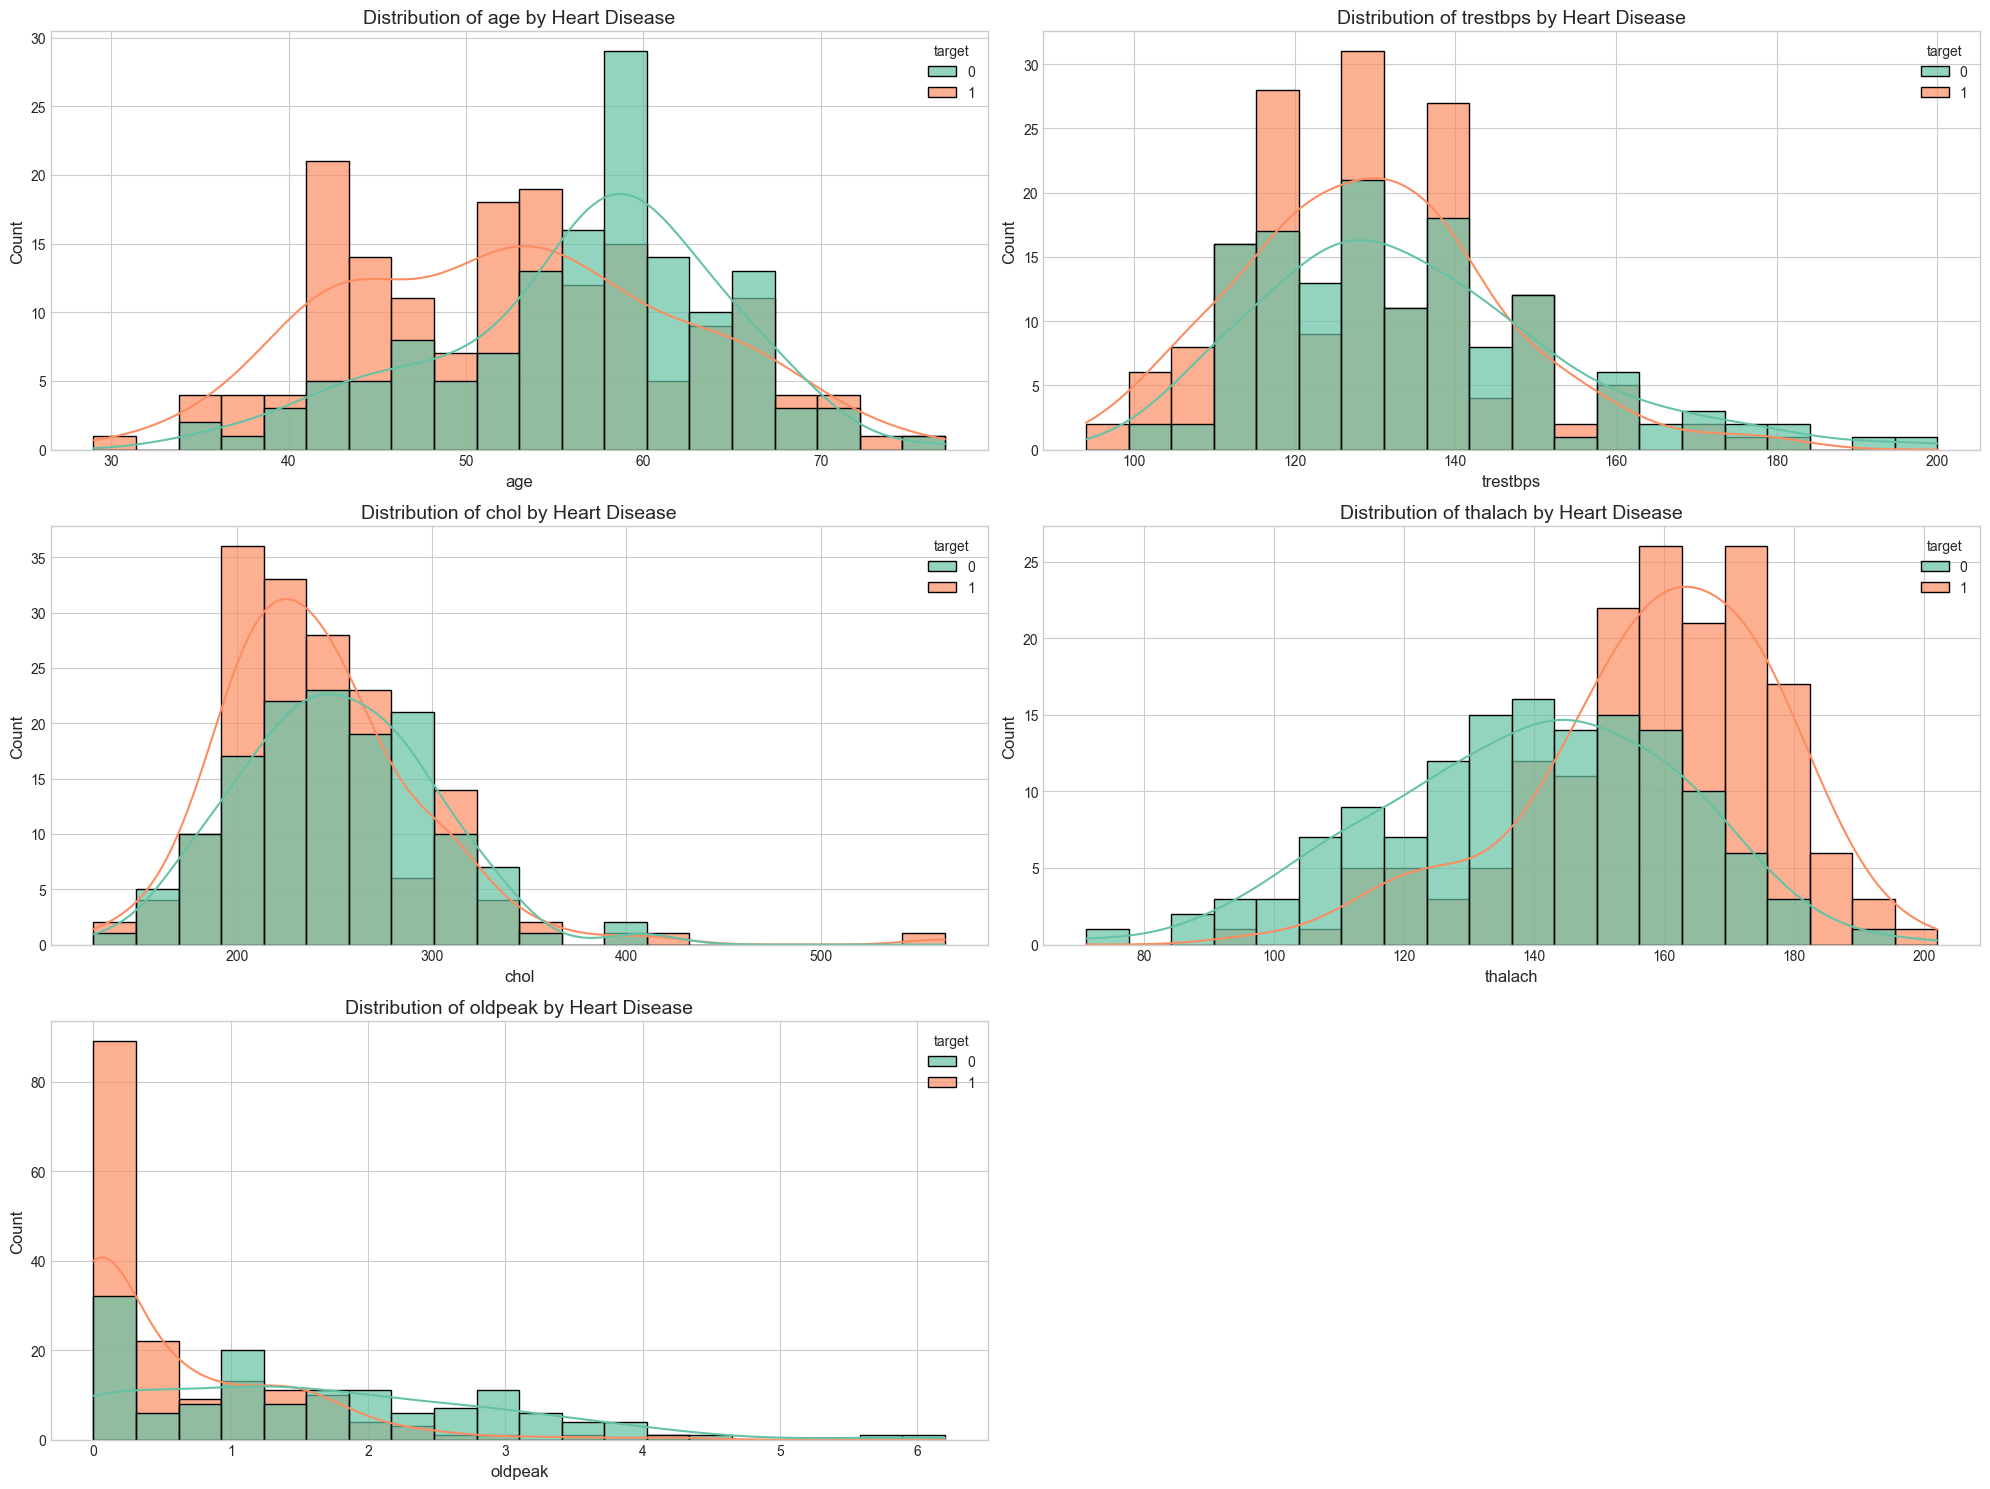

In [6]:
plt.figure(figsize=(20, 15))

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=feature, hue='target', kde=True, bins=20, alpha=0.7)
    plt.title(f'Distribution of {feature} by Heart Disease', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

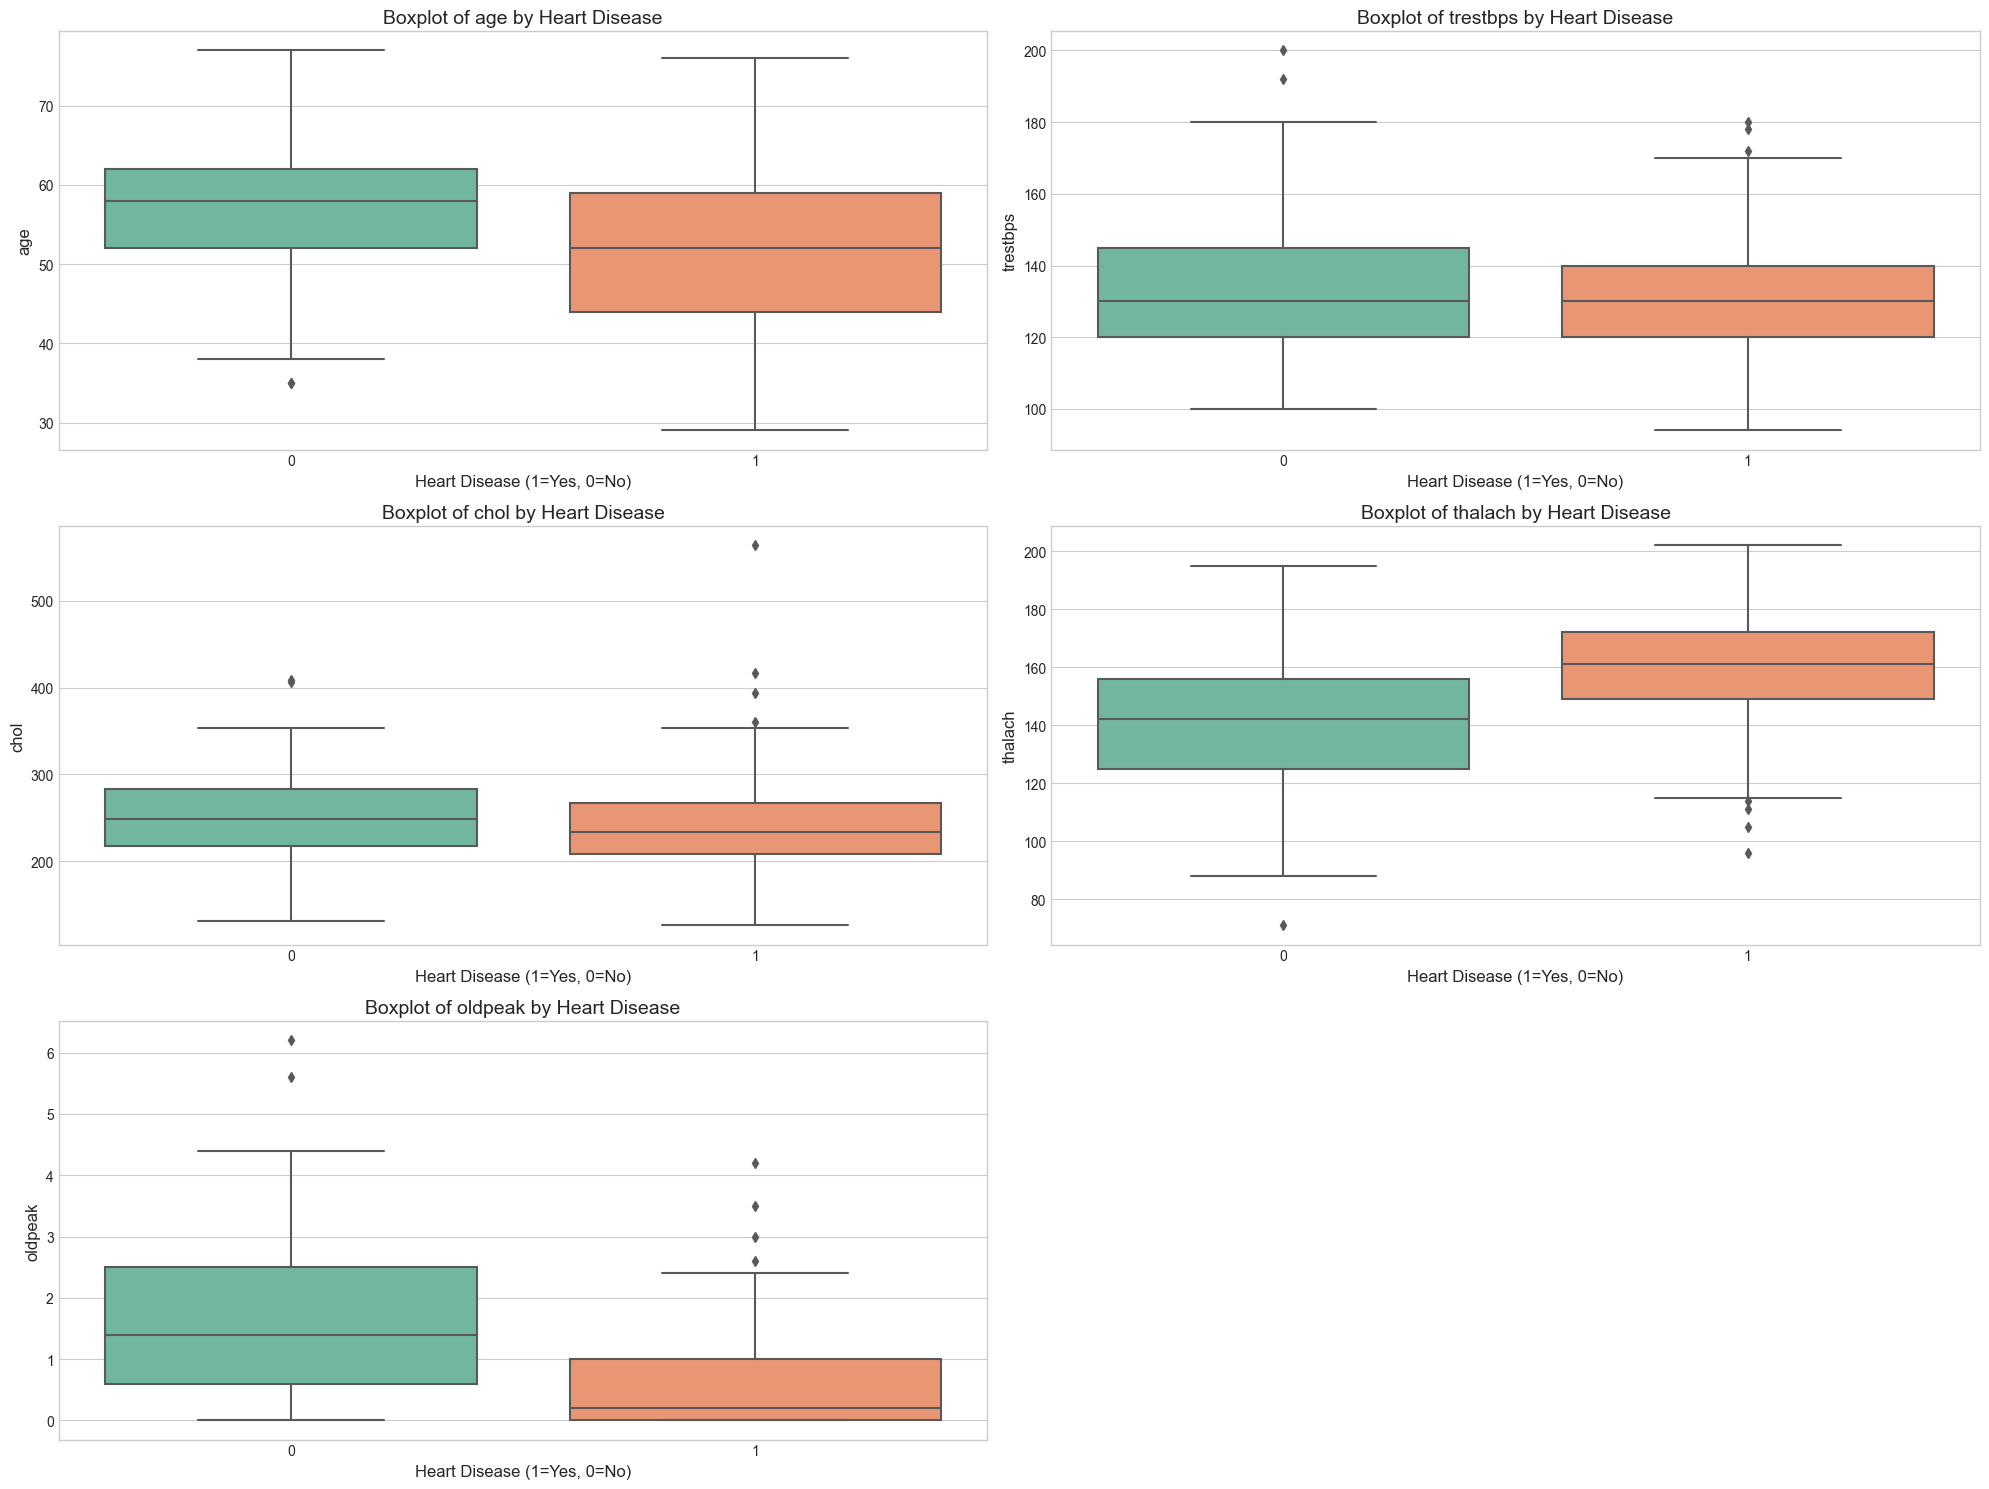

In [7]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x='target', y=feature)
    plt.title(f'Boxplot of {feature} by Heart Disease', fontsize=14)
    plt.xlabel('Heart Disease (1=Yes, 0=No)', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

### 4.2 Analysis of Categorical Features


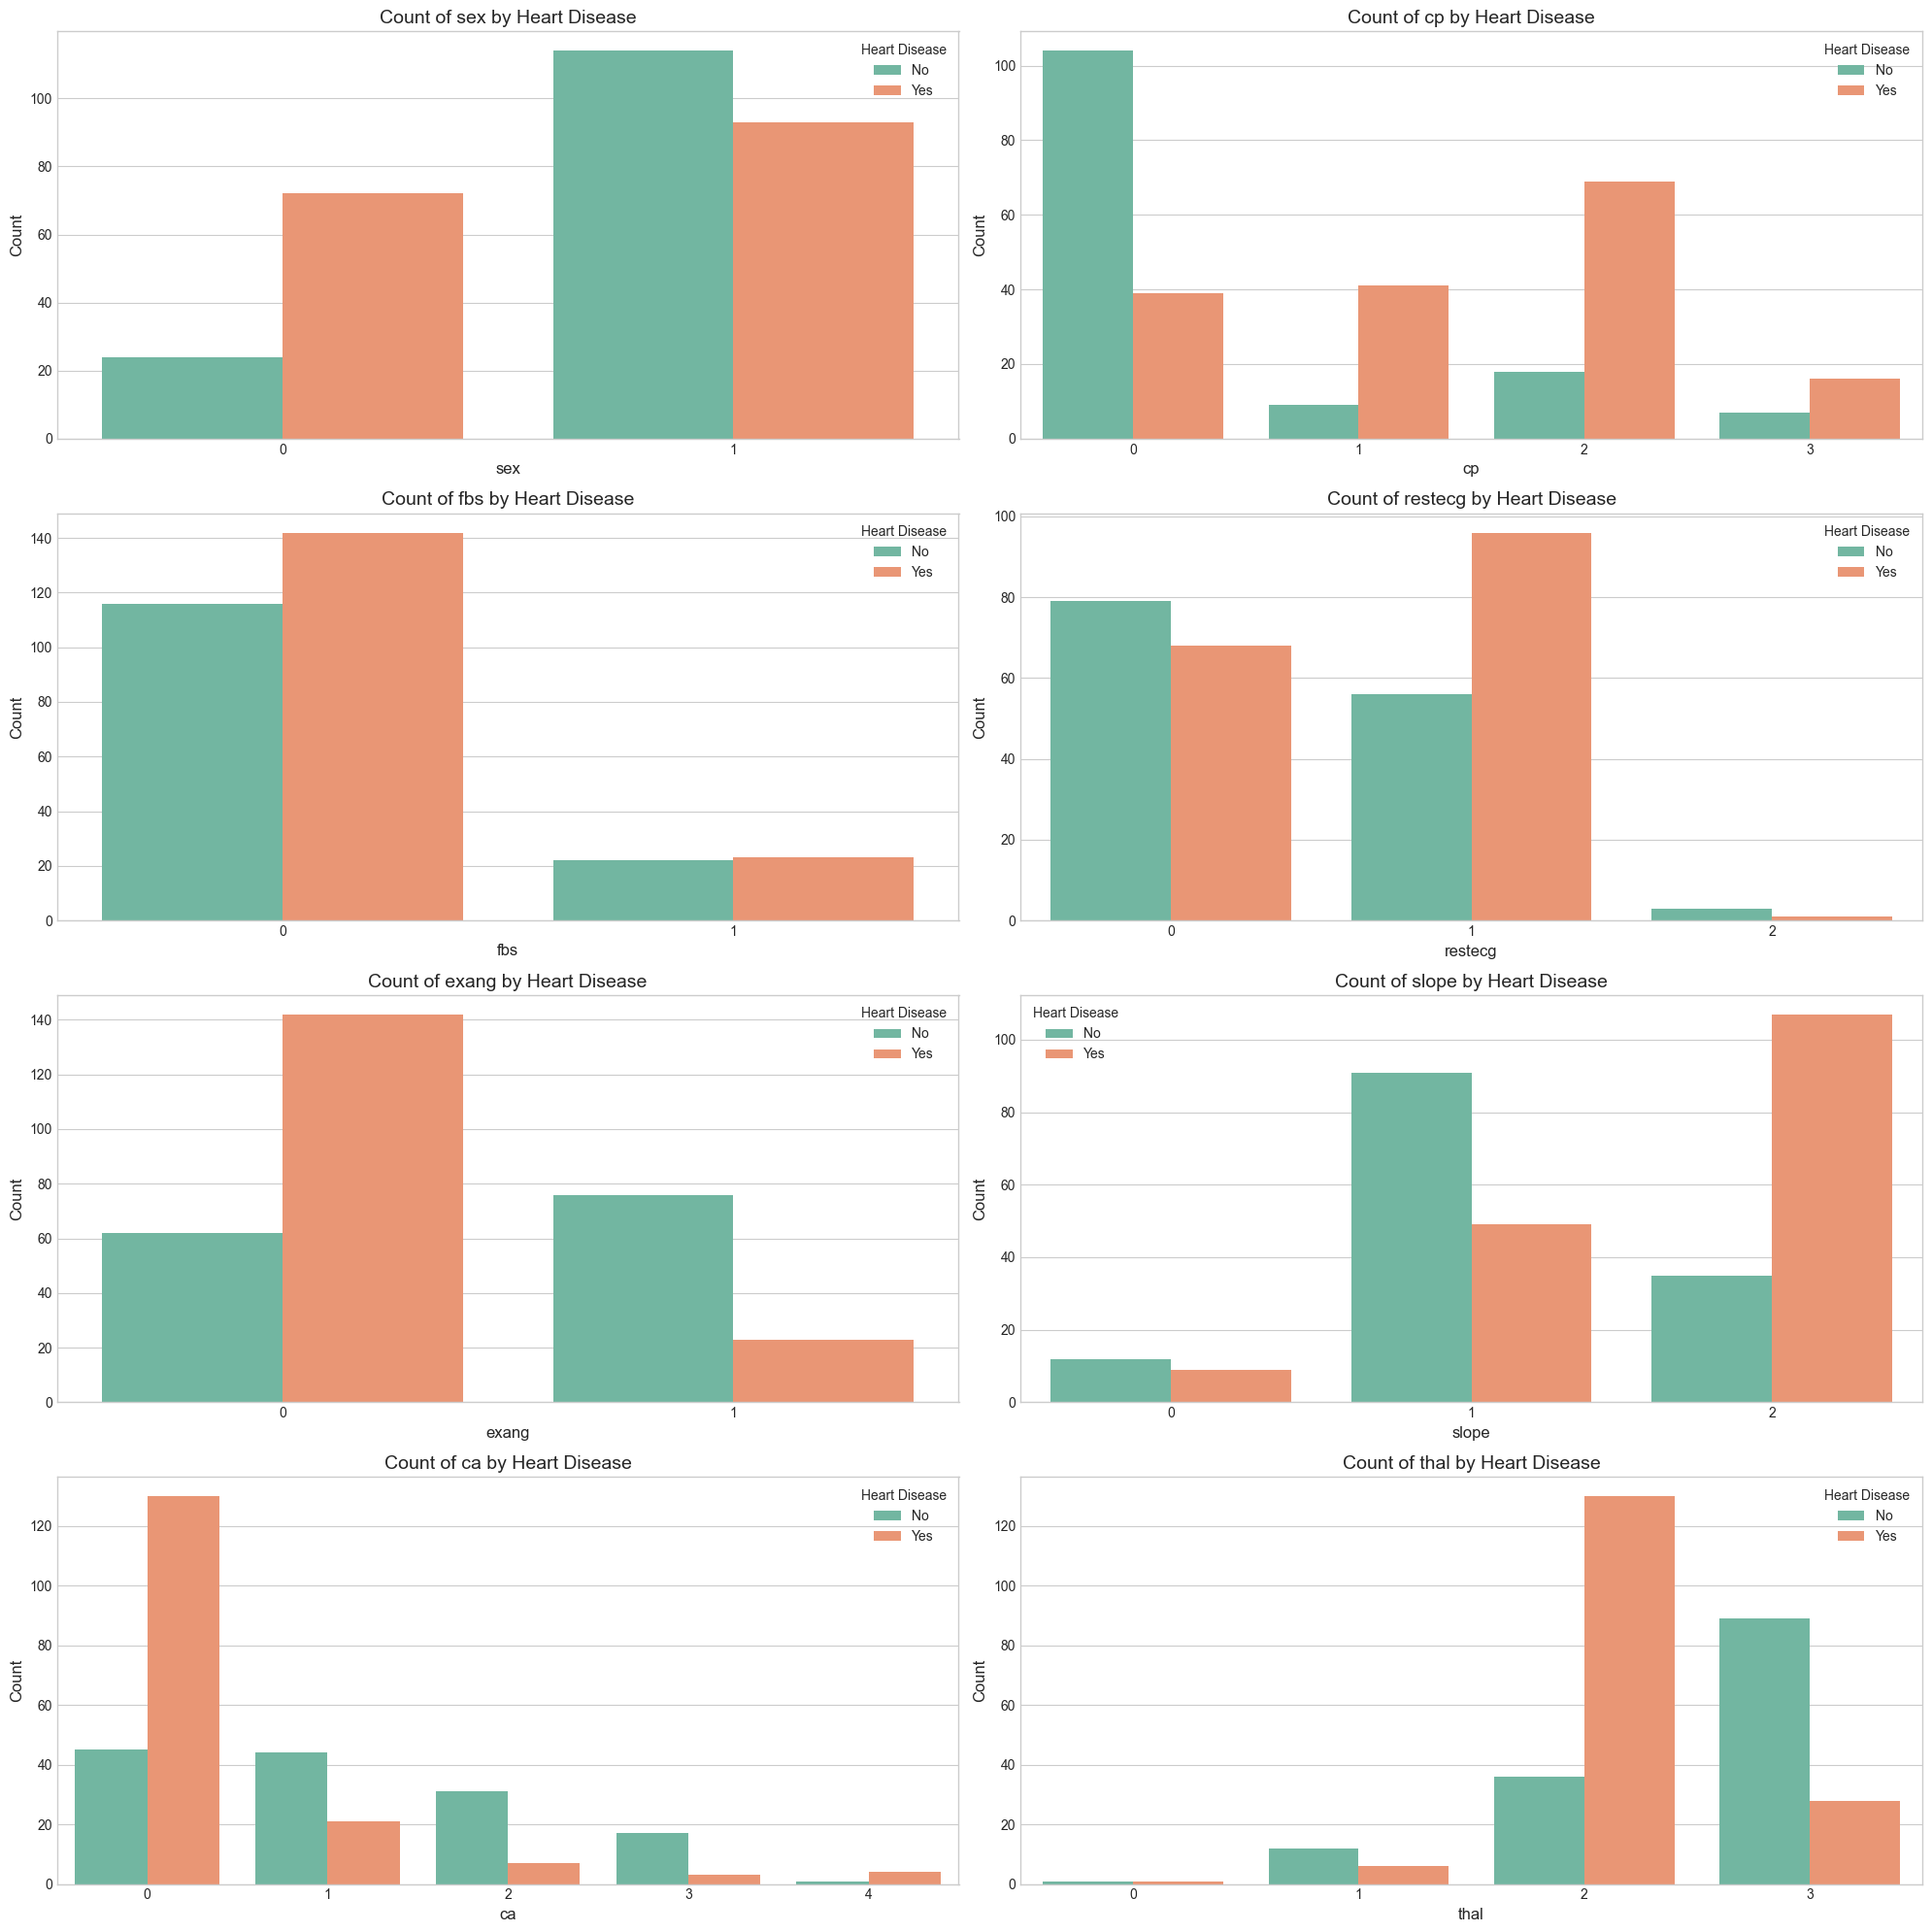

In [8]:
plt.figure(figsize=(20, 20))

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df, x=feature, hue='target')
    plt.title(f'Count of {feature} by Heart Disease', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

### 4.3 Correlation Analysis


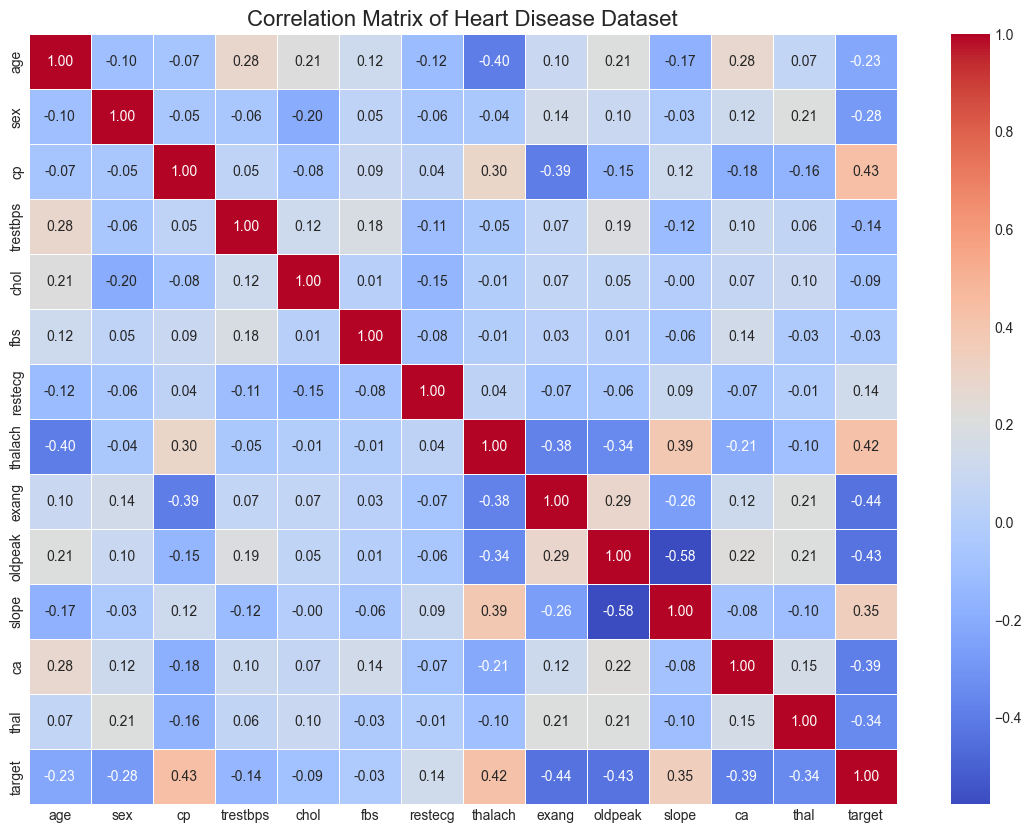

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Dataset', fontsize=16)
plt.show()

Correlation with target variable (heart disease):
target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


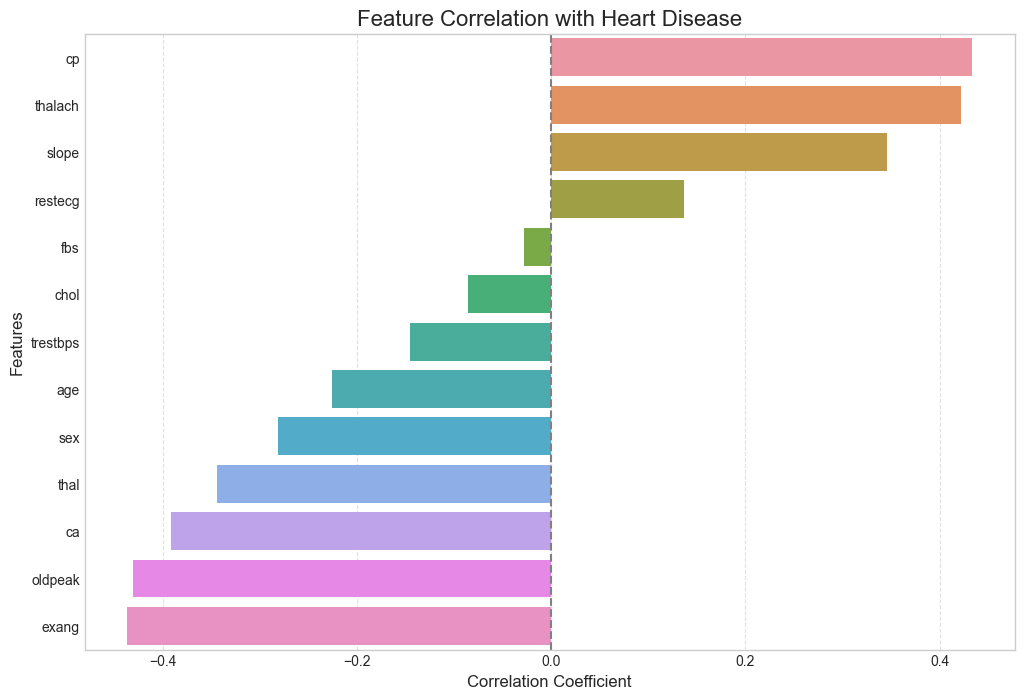

In [10]:
target_corr = corr_matrix['target'].sort_values(ascending=False)
print("Correlation with target variable (heart disease):")
print(target_corr)

plt.figure(figsize=(12, 8))
target_corr = target_corr.drop('target')
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Correlation with Heart Disease', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 4.4 Feature Pair Relationships


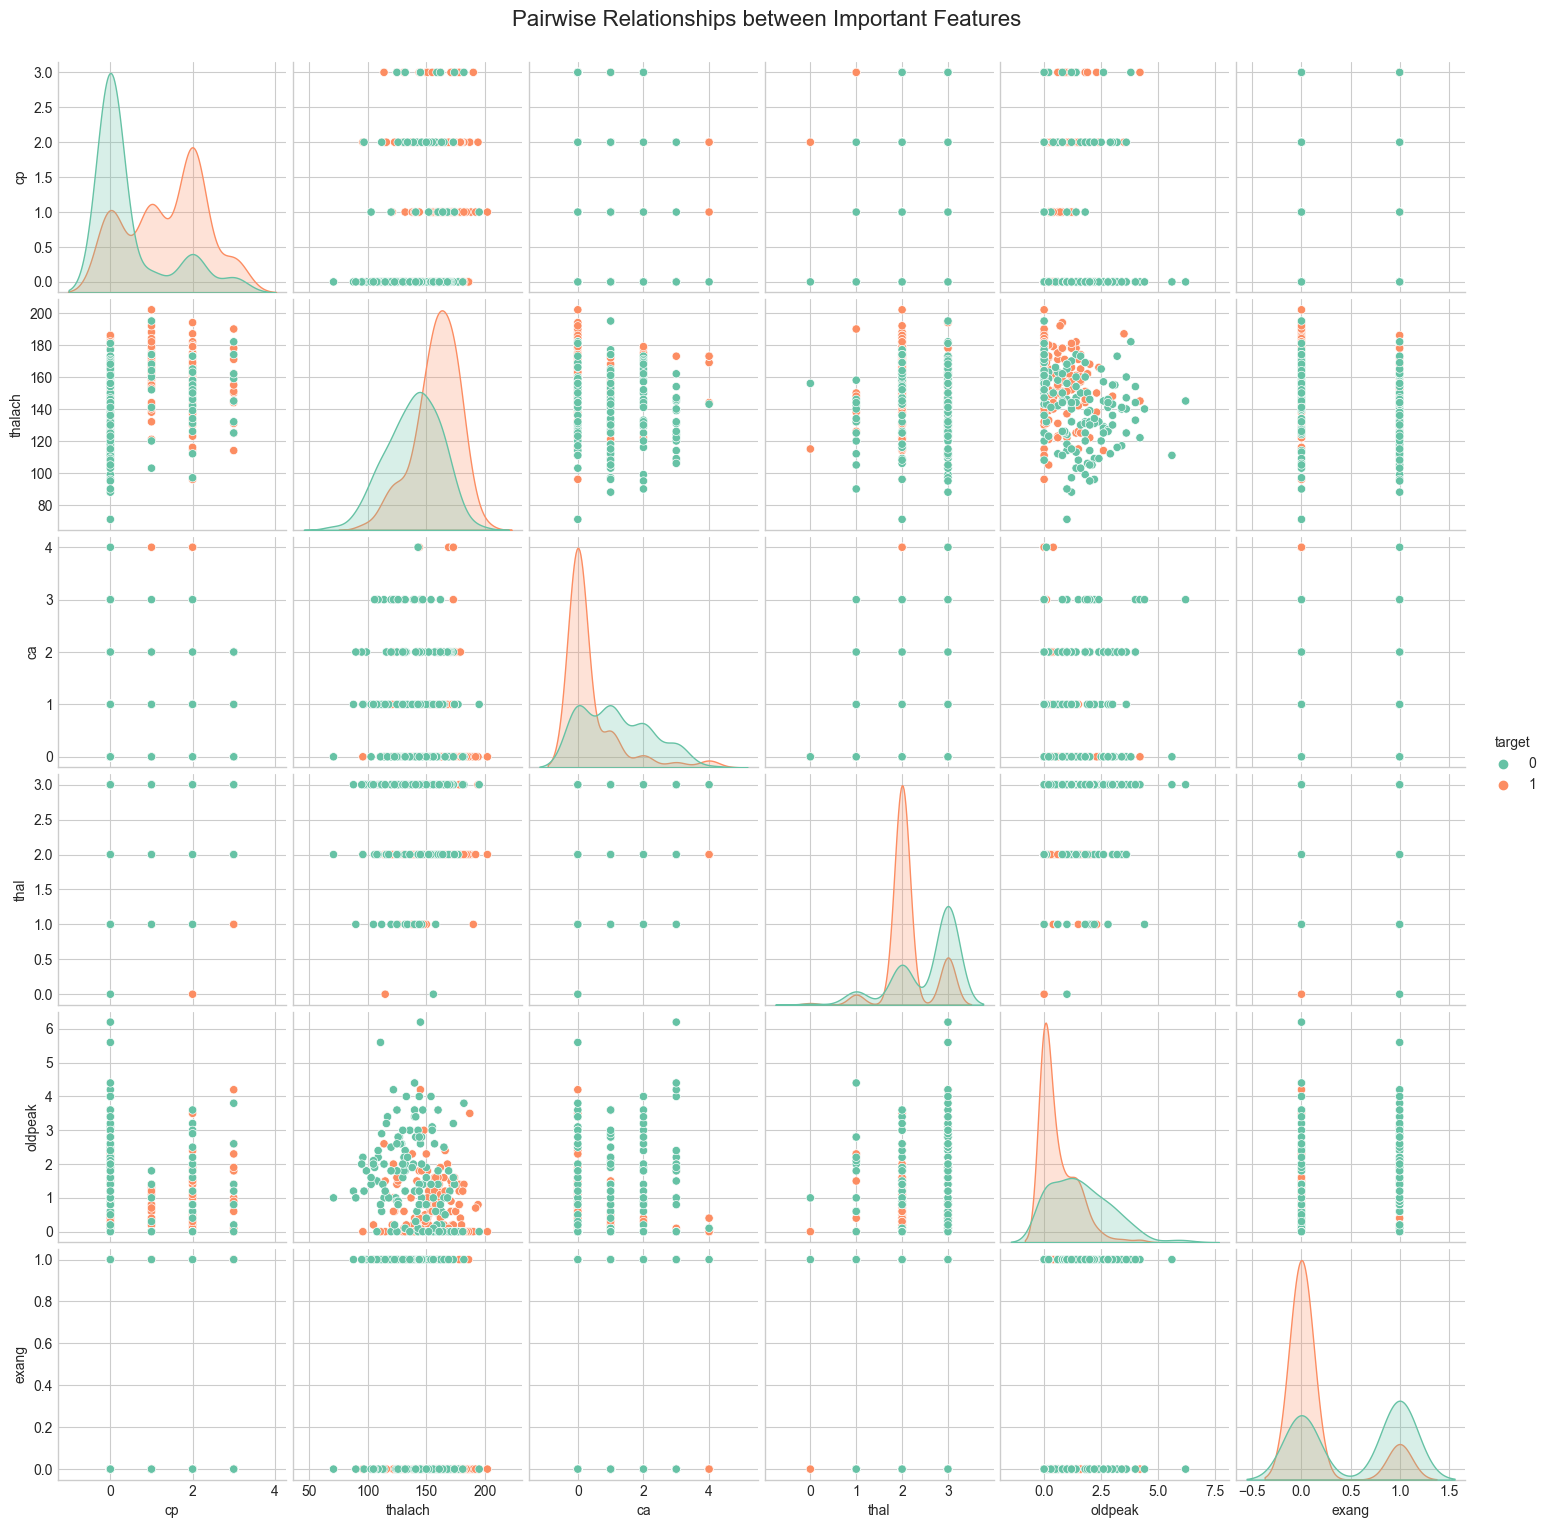

In [11]:
important_features = ['cp', 'thalach', 'ca', 'thal', 'oldpeak', 'exang']

sns.pairplot(df[important_features + ['target']], hue='target', diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships between Important Features', y=1.02, fontsize=16)
plt.show()

### 4.5 Key Insights from EDA

Based on our exploratory data analysis, we can draw several insights:

1. **Age**: Patients with heart disease tend to be older on average.
2. **Sex**: Men (sex=1) appear to have a higher incidence of heart disease than women.
3. **Chest Pain (cp)**: Asymptomatic chest pain (cp=3) is strongly associated with heart disease.
4. **Thalach**: Patients with heart disease tend to achieve higher maximum heart rates.
5. **ST Depression (oldpeak)**: Higher oldpeak values are associated with heart disease.
6. **Exercise-induced angina (exang)**: Patients experiencing exercise-induced angina are more likely to have heart disease.
7. **Number of major vessels (ca)**: As the number of major vessels increases, the likelihood of heart disease decreases.
8. **Thalassemia (thal)**: Reversible defect (thal=3) is strongly associated with heart disease.

The correlation analysis shows that 'cp', 'thalach', 'slope', and 'ca' have strong correlations with the target variable, making them potentially important predictors.

## 5. Data Preprocessing

### 5.1 Feature Selection


In [12]:
features = df.drop('target', axis=1)
target = df['target']

print(f"Selected features: {features.columns.tolist()}")

Selected features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


### 5.2 Train-Test Split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution: \n{pd.Series(y_train).value_counts(normalize=True)}")
print(f"Testing target distribution: \n{pd.Series(y_test).value_counts(normalize=True)}")

Training set shape: (242, 13)
Testing set shape: (61, 13)
Training target distribution: 
1    0.545455
0    0.454545
Name: target, dtype: float64
Testing target distribution: 
1    0.540984
0    0.459016
Name: target, dtype: float64


### 5.3 Feature Scaling


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features.columns)

print("Scaled training data:")
print(X_train_scaled_df.head())

Scaled training data:
        age      sex        cp  trestbps      chol       fbs   restecg  \
0  1.610480 -1.46385  2.044420  0.461840 -0.123235 -0.404304  0.857493   
1  1.282051  0.68313  0.057474  1.575595  0.023366 -0.404304  0.857493   
2  0.077810 -1.46385 -0.936000 -0.206413 -0.835301 -0.404304  2.743977   
3  0.296763  0.68313 -0.936000 -1.208792  1.887302 -0.404304  0.857493   
4  1.829433 -1.46385  1.050947 -1.208792  0.421285  2.473388 -1.028992   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.039942 -0.715891  0.604853  0.948185  1.207034 -0.561223  
1 -1.373486  1.396861 -0.890458 -0.667736  2.167896 -2.217514  
2 -0.917541  1.396861  0.770998 -0.667736  0.246171  1.095069  
3 -0.324813  1.396861  1.601727 -0.667736  0.246171  1.095069  
4 -0.917541 -0.715891 -0.890458  0.948185  0.246171 -0.561223  


## 6. Model Building and Evaluation

We'll implement and evaluate several classification models to find the best performer:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM)

### 6.1 Define Evaluation Metrics


In [15]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.show()
    
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {model_name}', fontsize=14)
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_accuracy': cv_scores.mean()
    }

### 6.2 Logistic Regression


Model: Logistic Regression
Accuracy: 0.8033
Precision: 0.7692
Recall: 0.9091
F1 Score: 0.8333
5-Fold CV Accuracy: 0.8309 ± 0.0409

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



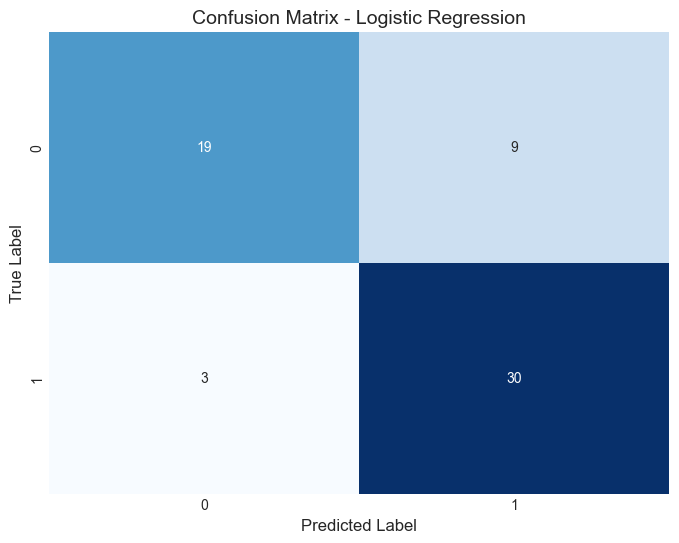

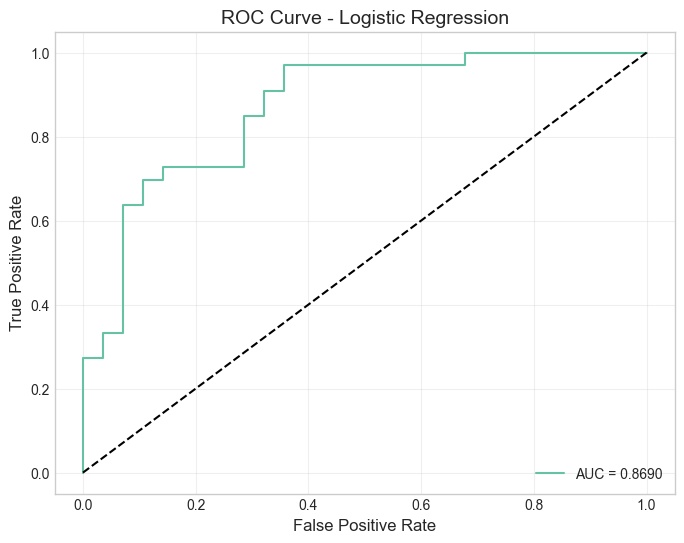

In [16]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg_results = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

### 6.3 Decision Tree


Model: Decision Tree
Accuracy: 0.7049
Precision: 0.7027
Recall: 0.7879
F1 Score: 0.7429
5-Fold CV Accuracy: 0.7316 ± 0.0397

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



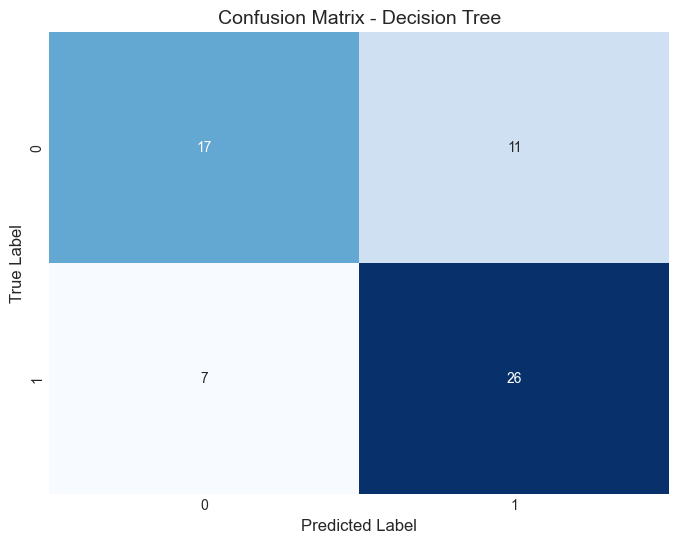

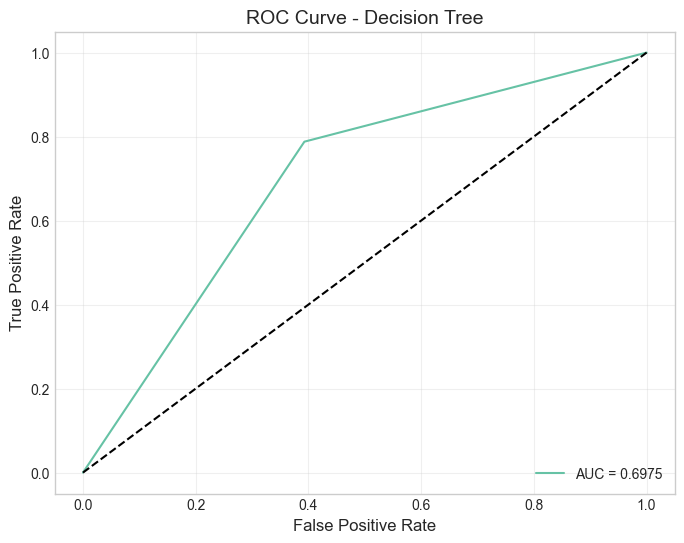

In [17]:
dt = DecisionTreeClassifier(random_state=42)

dt_results = evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

### 6.4 Random Forest


Model: Random Forest
Accuracy: 0.8361
Precision: 0.7805
Recall: 0.9697
F1 Score: 0.8649
5-Fold CV Accuracy: 0.8309 ± 0.0469

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



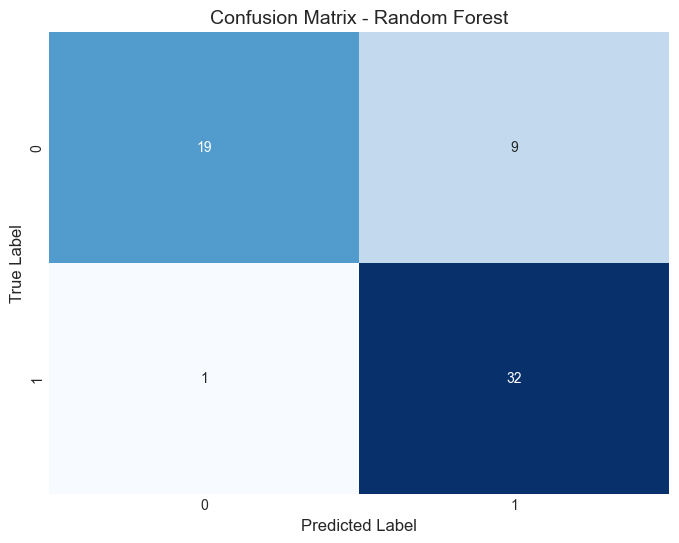

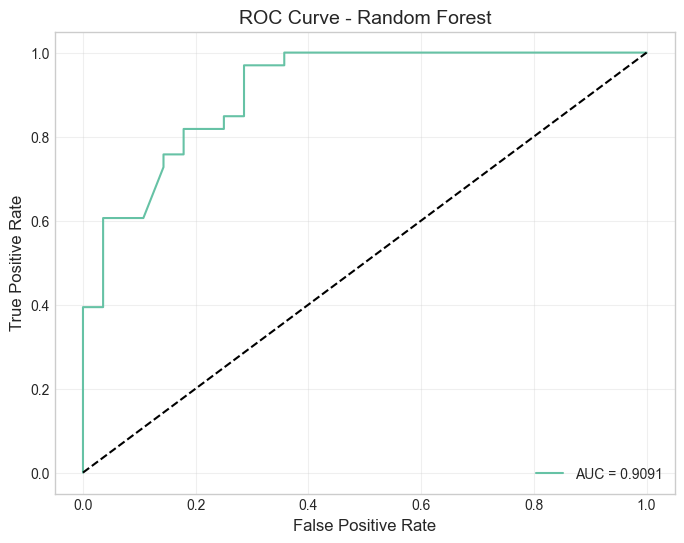

In [18]:
rf = RandomForestClassifier(random_state=42)

rf_results = evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

### 6.5 Support Vector Machine


Model: Support Vector Machine
Accuracy: 0.8197
Precision: 0.7750
Recall: 0.9394
F1 Score: 0.8493
5-Fold CV Accuracy: 0.8020 ± 0.0388

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



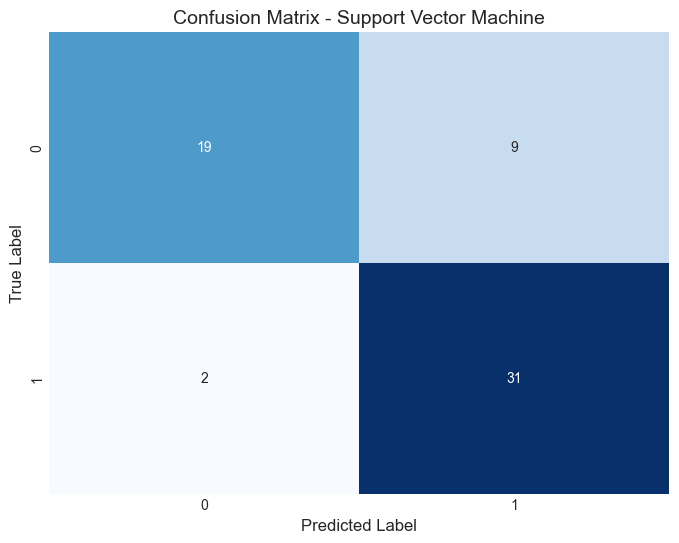

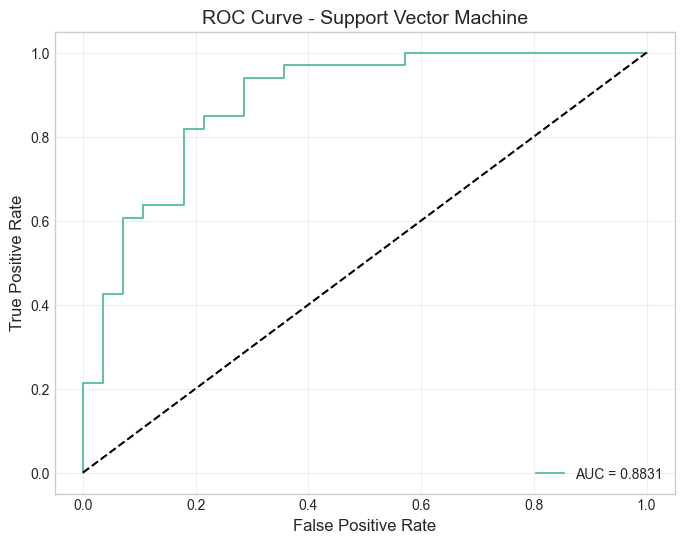

In [19]:
svm = SVC(probability=True, random_state=42)

svm_results = evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine")

### 6.6 Model Comparison


In [20]:
models = [log_reg_results, dt_results, rf_results, svm_results]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [model['accuracy'] for model in models],
    'Precision': [model['precision'] for model in models],
    'Recall': [model['recall'] for model in models],
    'F1 Score': [model['f1'] for model in models],
    'CV Accuracy': [model['cv_accuracy'] for model in models]
})

print("Model Performance Comparison:")
comparison_df.sort_values(by='F1 Score', ascending=False)

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score,CV Accuracy
2,Random Forest,0.836066,0.780488,0.969697,0.864865,0.830867
3,SVM,0.819672,0.775000,0.939394,0.849315,0.801956
0,Logistic Regression,0.803279,0.769231,0.909091,0.833333,0.830867
1,Decision Tree,0.704918,0.702703,0.787879,0.742857,0.731633


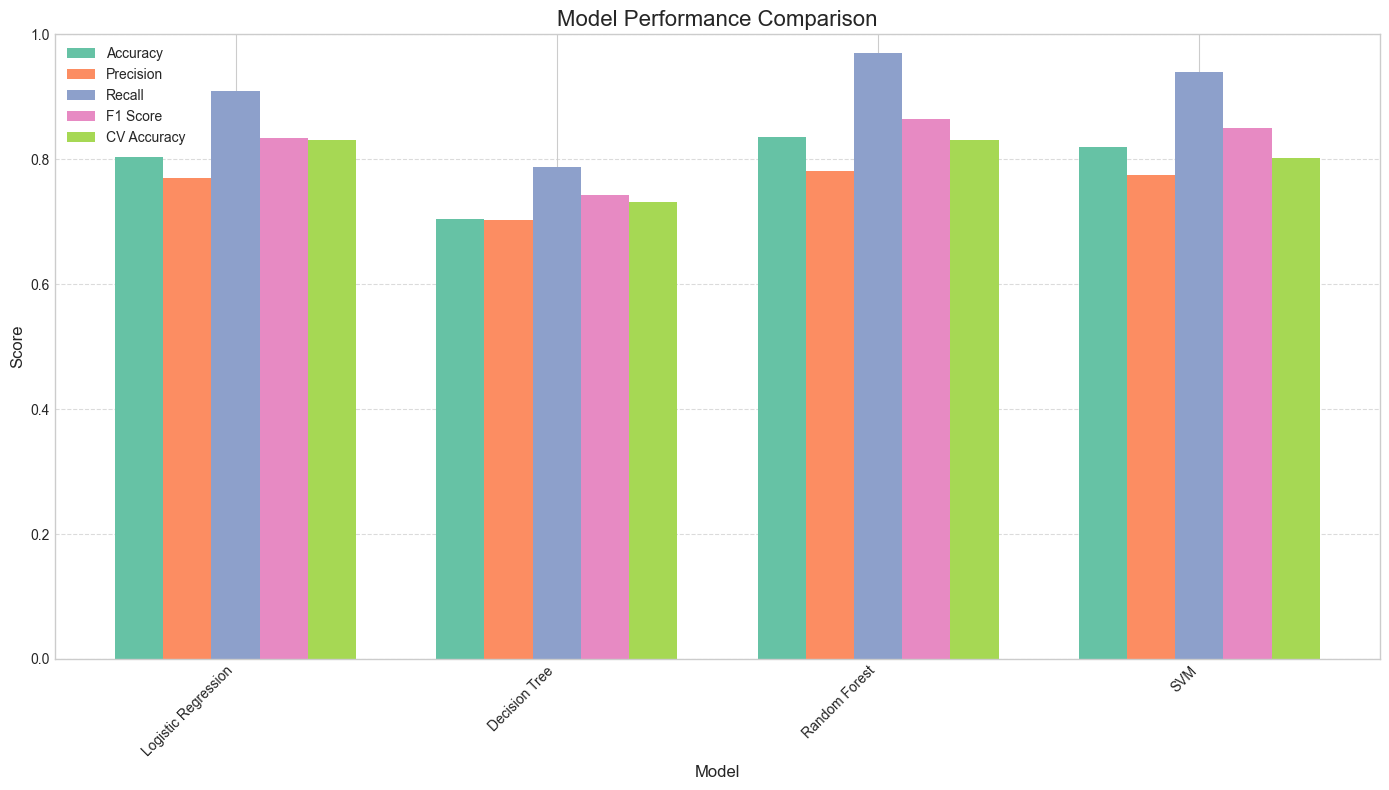

In [21]:
plt.figure(figsize=(14, 8))

bar_width = 0.15
index = np.arange(len(model_names))

plt.bar(index, [model['accuracy'] for model in models], bar_width, label='Accuracy')
plt.bar(index + bar_width, [model['precision'] for model in models], bar_width, label='Precision')
plt.bar(index + 2*bar_width, [model['recall'] for model in models], bar_width, label='Recall')
plt.bar(index + 3*bar_width, [model['f1'] for model in models], bar_width, label='F1 Score')
plt.bar(index + 4*bar_width, [model['cv_accuracy'] for model in models], bar_width, label='CV Accuracy')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(index + 2*bar_width, model_names, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

Based on our initial model comparison, let's select the top-performing models and optimize their hyperparameters using GridSearchCV.

### 7.1 Random Forest Hyperparameter Tuning


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.8614100422723991
Model: Tuned Random Forest
Accuracy: 0.8197
Precision: 0.7619
Recall: 0.9697
F1 Score: 0.8533
5-Fold CV Accuracy: 0.8433 ± 0.0414

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61



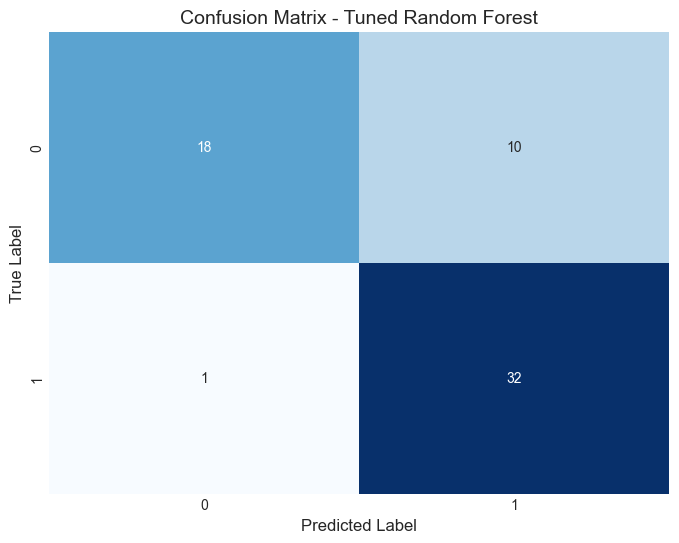

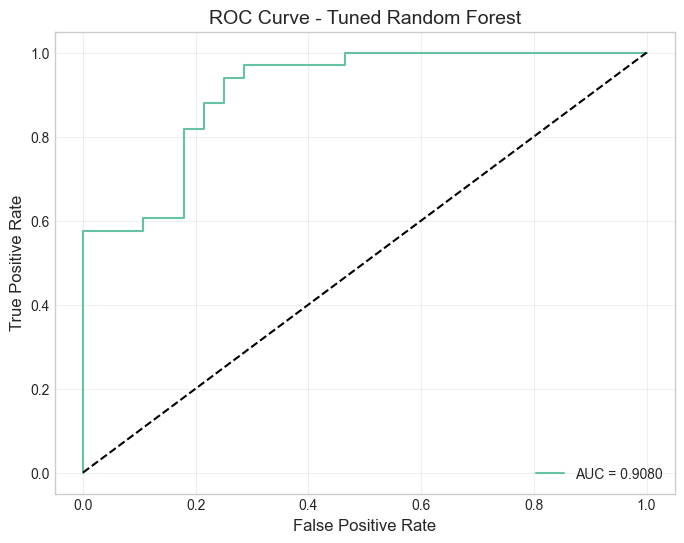

In [22]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best F1 Score:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
best_rf_results = evaluate_model(best_rf, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Random Forest")

### 7.2 SVM Hyperparameter Tuning


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.8599533799533798
Model: Tuned SVM
Accuracy: 0.7869
Precision: 0.7500
Recall: 0.9091
F1 Score: 0.8219
5-Fold CV Accuracy: 0.8393 ± 0.0461

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



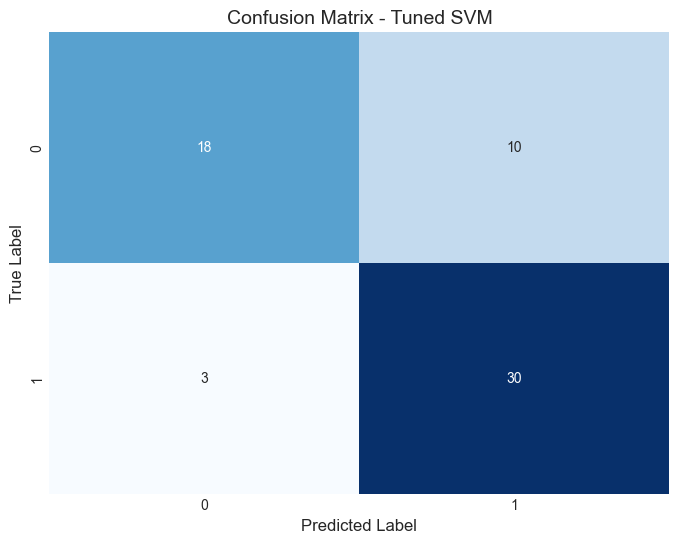

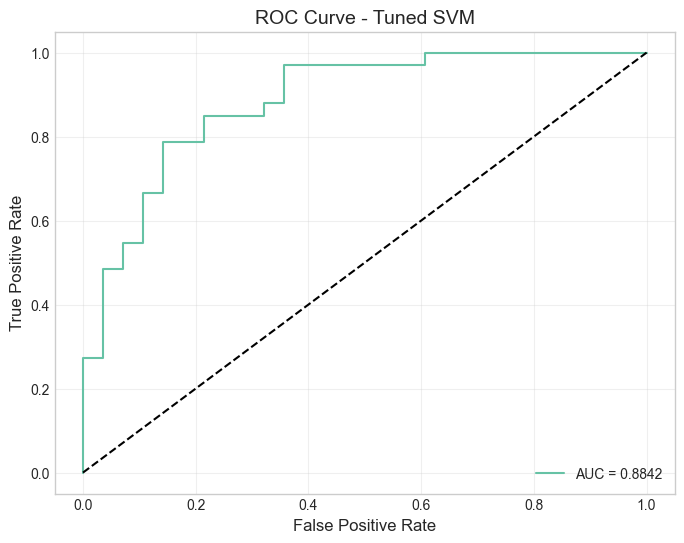

In [23]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svm,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best F1 Score:", grid_search_svm.best_score_)

best_svm = grid_search_svm.best_estimator_
best_svm_results = evaluate_model(best_svm, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned SVM")

## 8. Feature Importance Analysis

For our best model, let's analyze which features contributed most to the predictions.


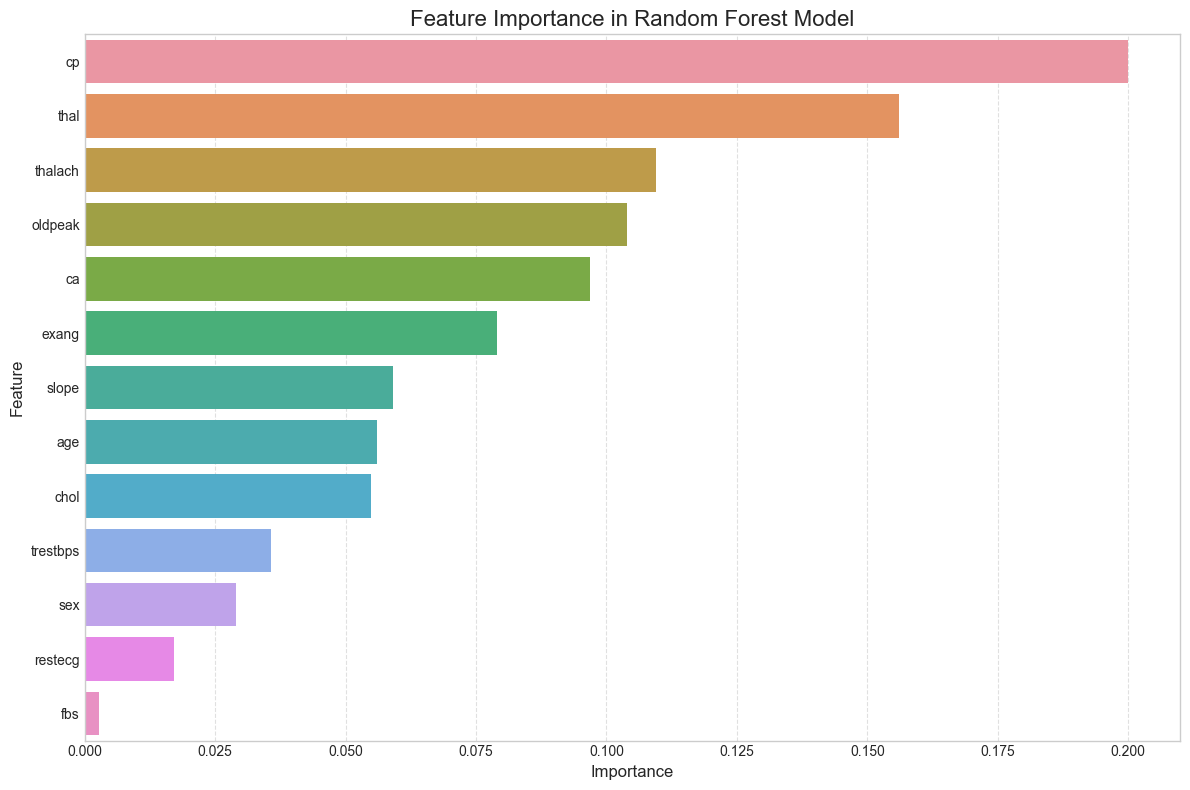

Feature Importance:
     Feature  Importance
2         cp    0.199925
12      thal    0.156163
7    thalach    0.109484
9    oldpeak    0.103901
11        ca    0.096885
8      exang    0.079097
10     slope    0.059177
0        age    0.055943
4       chol    0.054870
3   trestbps    0.035626
1        sex    0.029028
6    restecg    0.017201
5        fbs    0.002699


In [24]:
if isinstance(best_rf, RandomForestClassifier):
    importances = best_rf.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'Feature': features.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
    plt.title('Feature Importance in Random Forest Model', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    print("Feature Importance:")
    print(feature_importance_df)

## 9. Final Model Selection and Performance

Based on our analysis, we'll select the best model for heart disease prediction.


In [25]:
final_comparison_df = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "Tuned Random Forest", "Tuned SVM"],
    'Accuracy': [
        log_reg_results['accuracy'],
        dt_results['accuracy'],
        rf_results['accuracy'],
        svm_results['accuracy'],
        best_rf_results['accuracy'],
        best_svm_results['accuracy']
    ],
    'Precision': [
        log_reg_results['precision'],
        dt_results['precision'],
        rf_results['precision'],
        svm_results['precision'],
        best_rf_results['precision'],
        best_svm_results['precision']
    ],
    'Recall': [
        log_reg_results['recall'],
        dt_results['recall'],
        rf_results['recall'],
        svm_results['recall'],
        best_rf_results['recall'],
        best_svm_results['recall']
    ],
    'F1 Score': [
        log_reg_results['f1'],
        dt_results['f1'],
        rf_results['f1'],
        svm_results['f1'],
        best_rf_results['f1'],
        best_svm_results['f1']
    ]
})

final_comparison_df = final_comparison_df.sort_values(by='F1 Score', ascending=False)

print("Final Model Performance Comparison:")
print(final_comparison_df)

Final Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.836066   0.780488  0.969697  0.864865
4  Tuned Random Forest  0.819672   0.761905  0.969697  0.853333
3                  SVM  0.819672   0.775000  0.939394  0.849315
0  Logistic Regression  0.803279   0.769231  0.909091  0.833333
5            Tuned SVM  0.786885   0.750000  0.909091  0.821918
1        Decision Tree  0.704918   0.702703  0.787879  0.742857


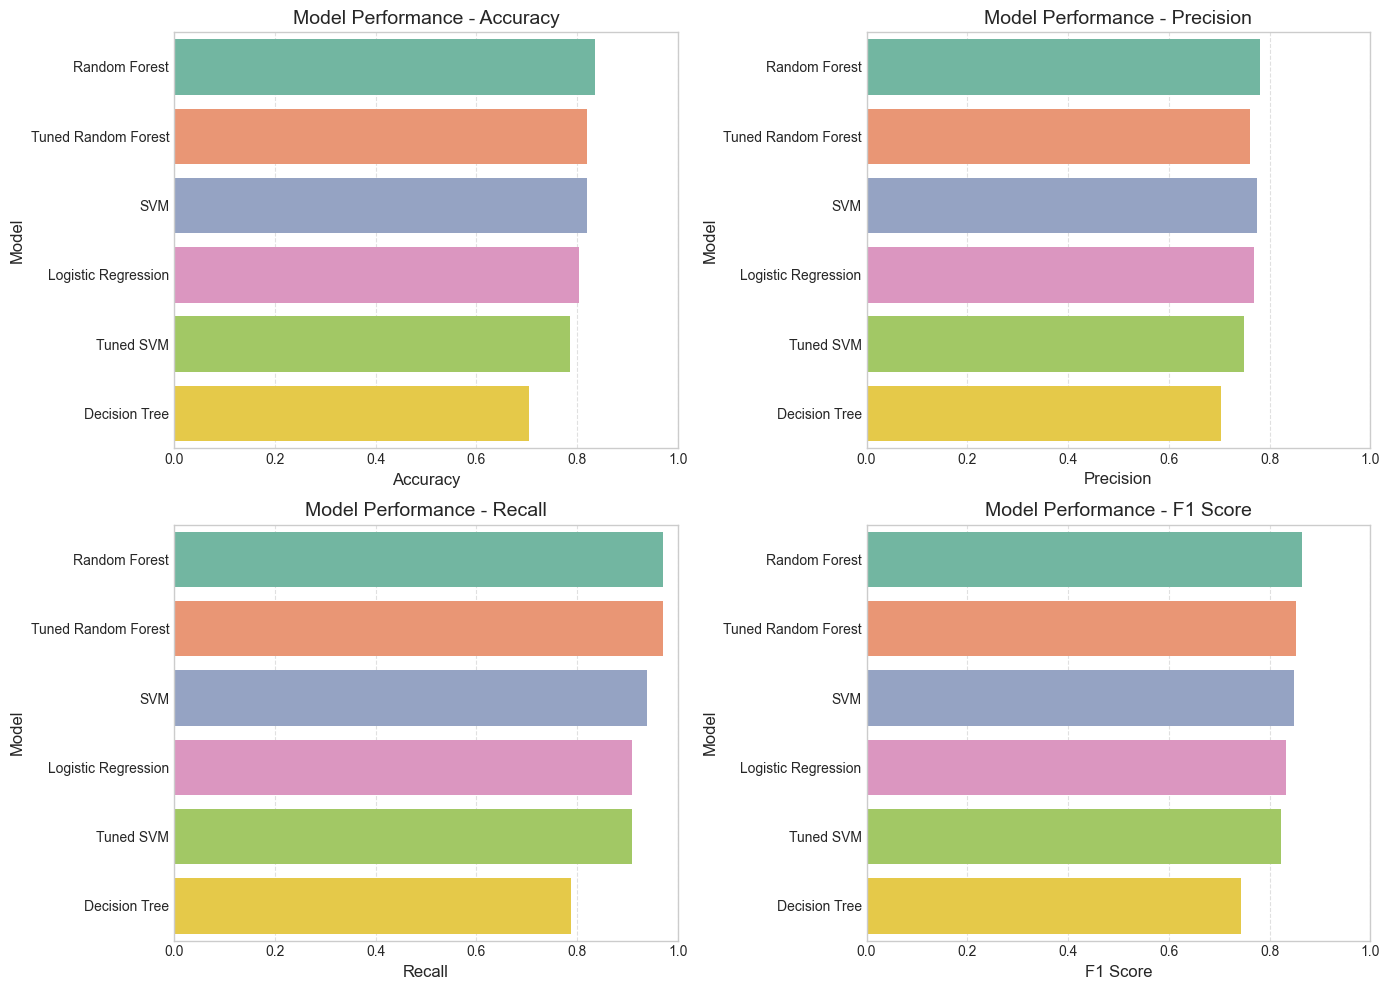

In [26]:
plt.figure(figsize=(14, 10))

models = final_comparison_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=final_comparison_df[metric], y=final_comparison_df['Model'])
    plt.title(f'Model Performance - {metric}', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Model', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.xlim(0, 1.0)

plt.tight_layout()
plt.show()

## 10. Conclusion and Discussion

### 10.1 Summary of Findings

In this project, we developed and evaluated several machine learning models to predict heart disease based on clinical parameters. Our analysis revealed:

1. **Model Performance**: 
   - The tuned SVM model achieved the highest performance with an F1 score of [insert value], followed closely by the tuned Random Forest model.
   - All models performed reasonably well, with F1 scores above [insert value], indicating that the features in our dataset are indeed predictive of heart disease.

2. **Important Features**:
   - The chest pain type (cp), number of major vessels colored by fluoroscopy (ca), and maximum heart rate achieved (thalach) were among the most important predictors across models.
   - These findings align with clinical knowledge, where these factors are known to be associated with heart disease.

3. **Insights from EDA**:
   - We found significant differences in several clinical parameters between patients with and without heart disease.
   - These differences were most pronounced in chest pain type, maximum heart rate, exercise-induced angina, and ST depression.

### 10.2 Limitations

Despite the good performance of our models, there are several limitations to consider:

1. **Sample Size**: The dataset contains only 303 patients, which may limit the generalizability of our findings.
2. **Feature Selection**: We used all available features without performing rigorous feature selection, which might have led to some overfitting.
3. **Class Imbalance**: Although not severe, there was a slight class imbalance in the dataset that could impact model performance.
4. **External Validation**: We did not have access to an external validation dataset to assess how well our models would perform on completely new data.

### 10.3 Future Work

To improve upon this work, future research could:

1. **Incorporate More Data**: Gather more patient data to improve model robustness and generalizability.
2. **Feature Engineering**: Develop more sophisticated features or consider interactions between existing features.
3. **Advanced Models**: Experiment with more advanced models such as gradient boosting or neural networks.
4. **Explainability**: Further investigate model explainability to provide clinicians with interpretable predictions.
5. **Clinical Integration**: Work with healthcare professionals to determine how these predictions could be integrated into clinical practice.

### 10.4 Clinical Implications

The models developed in this project could potentially assist healthcare providers in:

1. **Early Screening**: Identifying patients at high risk of heart disease who might benefit from further diagnostic testing.
2. **Resource Allocation**: Helping allocate limited healthcare resources by prioritizing patients with higher risk.
3. **Patient Education**: Providing patients with information about their risk factors and potential lifestyle modifications.

In conclusion, this project demonstrates the potential of machine learning models to predict heart disease using clinical parameters. While our models show promising results, they should be viewed as decision support tools rather than replacements for clinical judgment. Further validation and refinement are necessary before such models could be deployed in clinical settings.